# Making cool visuals in matplotlib


In [2]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [3]:
prem = pl.read_csv("data/premier_league_tables.csv")

prem.head(5)

pos,team,pld,w,d,l,gf,ga,gd,pts,qualification_or_relegation,season
i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str
1,"""Manchester United """,42,24,12,6,67,31,36,84,"""Qualification for the Champion…","""1992-1993"""
2,"""Aston Villa""",42,21,11,10,57,40,17,74,"""Qualification for the UEFA Cup…","""1992-1993"""
3,"""Norwich City""",42,21,9,12,61,65,-4,72,"""Qualification for the UEFA Cup…","""1992-1993"""
4,"""Blackburn Rovers""",42,20,11,11,68,46,22,71,null,"""1992-1993"""
5,"""Queens Park Rangers""",42,17,12,13,63,55,8,63,null,"""1992-1993"""


In [4]:
relegated = (
    prem
    .filter(pl.col('qualification_or_relegation').str.contains("Relegation"))
)

relegated.tail(5)

pos,team,pld,w,d,l,gf,ga,gd,pts,qualification_or_relegation,season
i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str
19,"""Burnley """,38,5,9,24,41,78,-37,24,"""Relegation to EFL Championship""","""2023-2024"""
20,"""Sheffield United """,38,3,7,28,35,104,-69,16,"""Relegation to EFL Championship""","""2023-2024"""
18,"""Leicester City """,38,6,7,25,33,80,-47,25,"""Relegation to EFL Championship""","""2024-2025"""
19,"""Ipswich Town """,38,4,10,24,36,82,-46,22,"""Relegation to EFL Championship""","""2024-2025"""
20,"""Southampton """,38,2,6,30,26,86,-60,12,"""Relegation to EFL Championship""","""2024-2025"""


In [5]:
(
    relegated
    .get_column('team')
    .value_counts(sort=True, name="n_relegated")
 )

team,n_relegated
str,u32
"""Norwich City """,6
"""Leicester City """,5
"""West Bromwich Albion """,5
"""Middlesbrough """,4
"""Sheffield United """,4
…,…
"""Swansea City """,1
"""Stoke City """,1
"""Huddersfield Town """,1


In [6]:
relegation_agg = (
    relegated
    .group_by("team")
    .agg(
        pl.len().alias("n_relegated"),
        pl.col("pts").mean().alias("avg_points"),
        pl.col("gd").mean().alias("avg_goal_diff")
    )
    .sort("n_relegated", descending=True)
)

relegation_agg.head()

team,n_relegated,avg_points,avg_goal_diff
str,u32,f64,f64
"""Norwich City """,6,31.0,-37.333333
"""West Bromwich Albion """,5,29.0,-32.0
"""Leicester City """,5,29.8,-30.0
"""Burnley """,4,30.5,-30.25
"""Middlesbrough """,4,35.75,-21.25


Playing around with the rc params

https://matplotlib.org/stable/users/explain/customizing.html
https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams
https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html#Changing-the-Defaults:-rcParams 
https://www.matplotlib-journey.com/module1/matplotlib-pattern




In [7]:

most_reg = (
    relegated
    .filter(pl.col("team")
            .str.contains(relegation_agg.get_column("team")[0]))
)

reg_title = f"Goal differences of teams relegated from the premier league\n{most_reg.get_column("team")[0]}are the most relegated team with {most_reg.shape[0]} relegations"


In [8]:
top_reg = relegation_agg.filter(pl.col("n_relegated") >= 4).get_column("team")
rest_reg = relegation_agg.filter(pl.col("n_relegated") <= 4).get_column("team")

top_reg_df = relegated.filter(pl.col('team').is_in(top_reg))
rest_reg_df = relegated.filter(pl.col('team').is_in(rest_reg))

top_reg

/var/folders/vt/wcll1gs51js3cfqj5vk0vdz40000gp/T/ipykernel_13251/3428268867.py:4: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  top_reg_df = relegated.filter(pl.col('team').is_in(top_reg))
/var/folders/vt/wcll1gs51js3cfqj5vk0vdz40000gp/T/ipykernel_13251/3428268867.py:5: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  rest_reg_df = relegated.filter(pl.col('team').is_in(rest_reg))


team
str
"""Norwich City """
"""West Bromwich Albion """
"""Leicester City """
"""Burnley """
"""Middlesbrough """
"""Sunderland """
"""Watford """
"""Sheffield United """


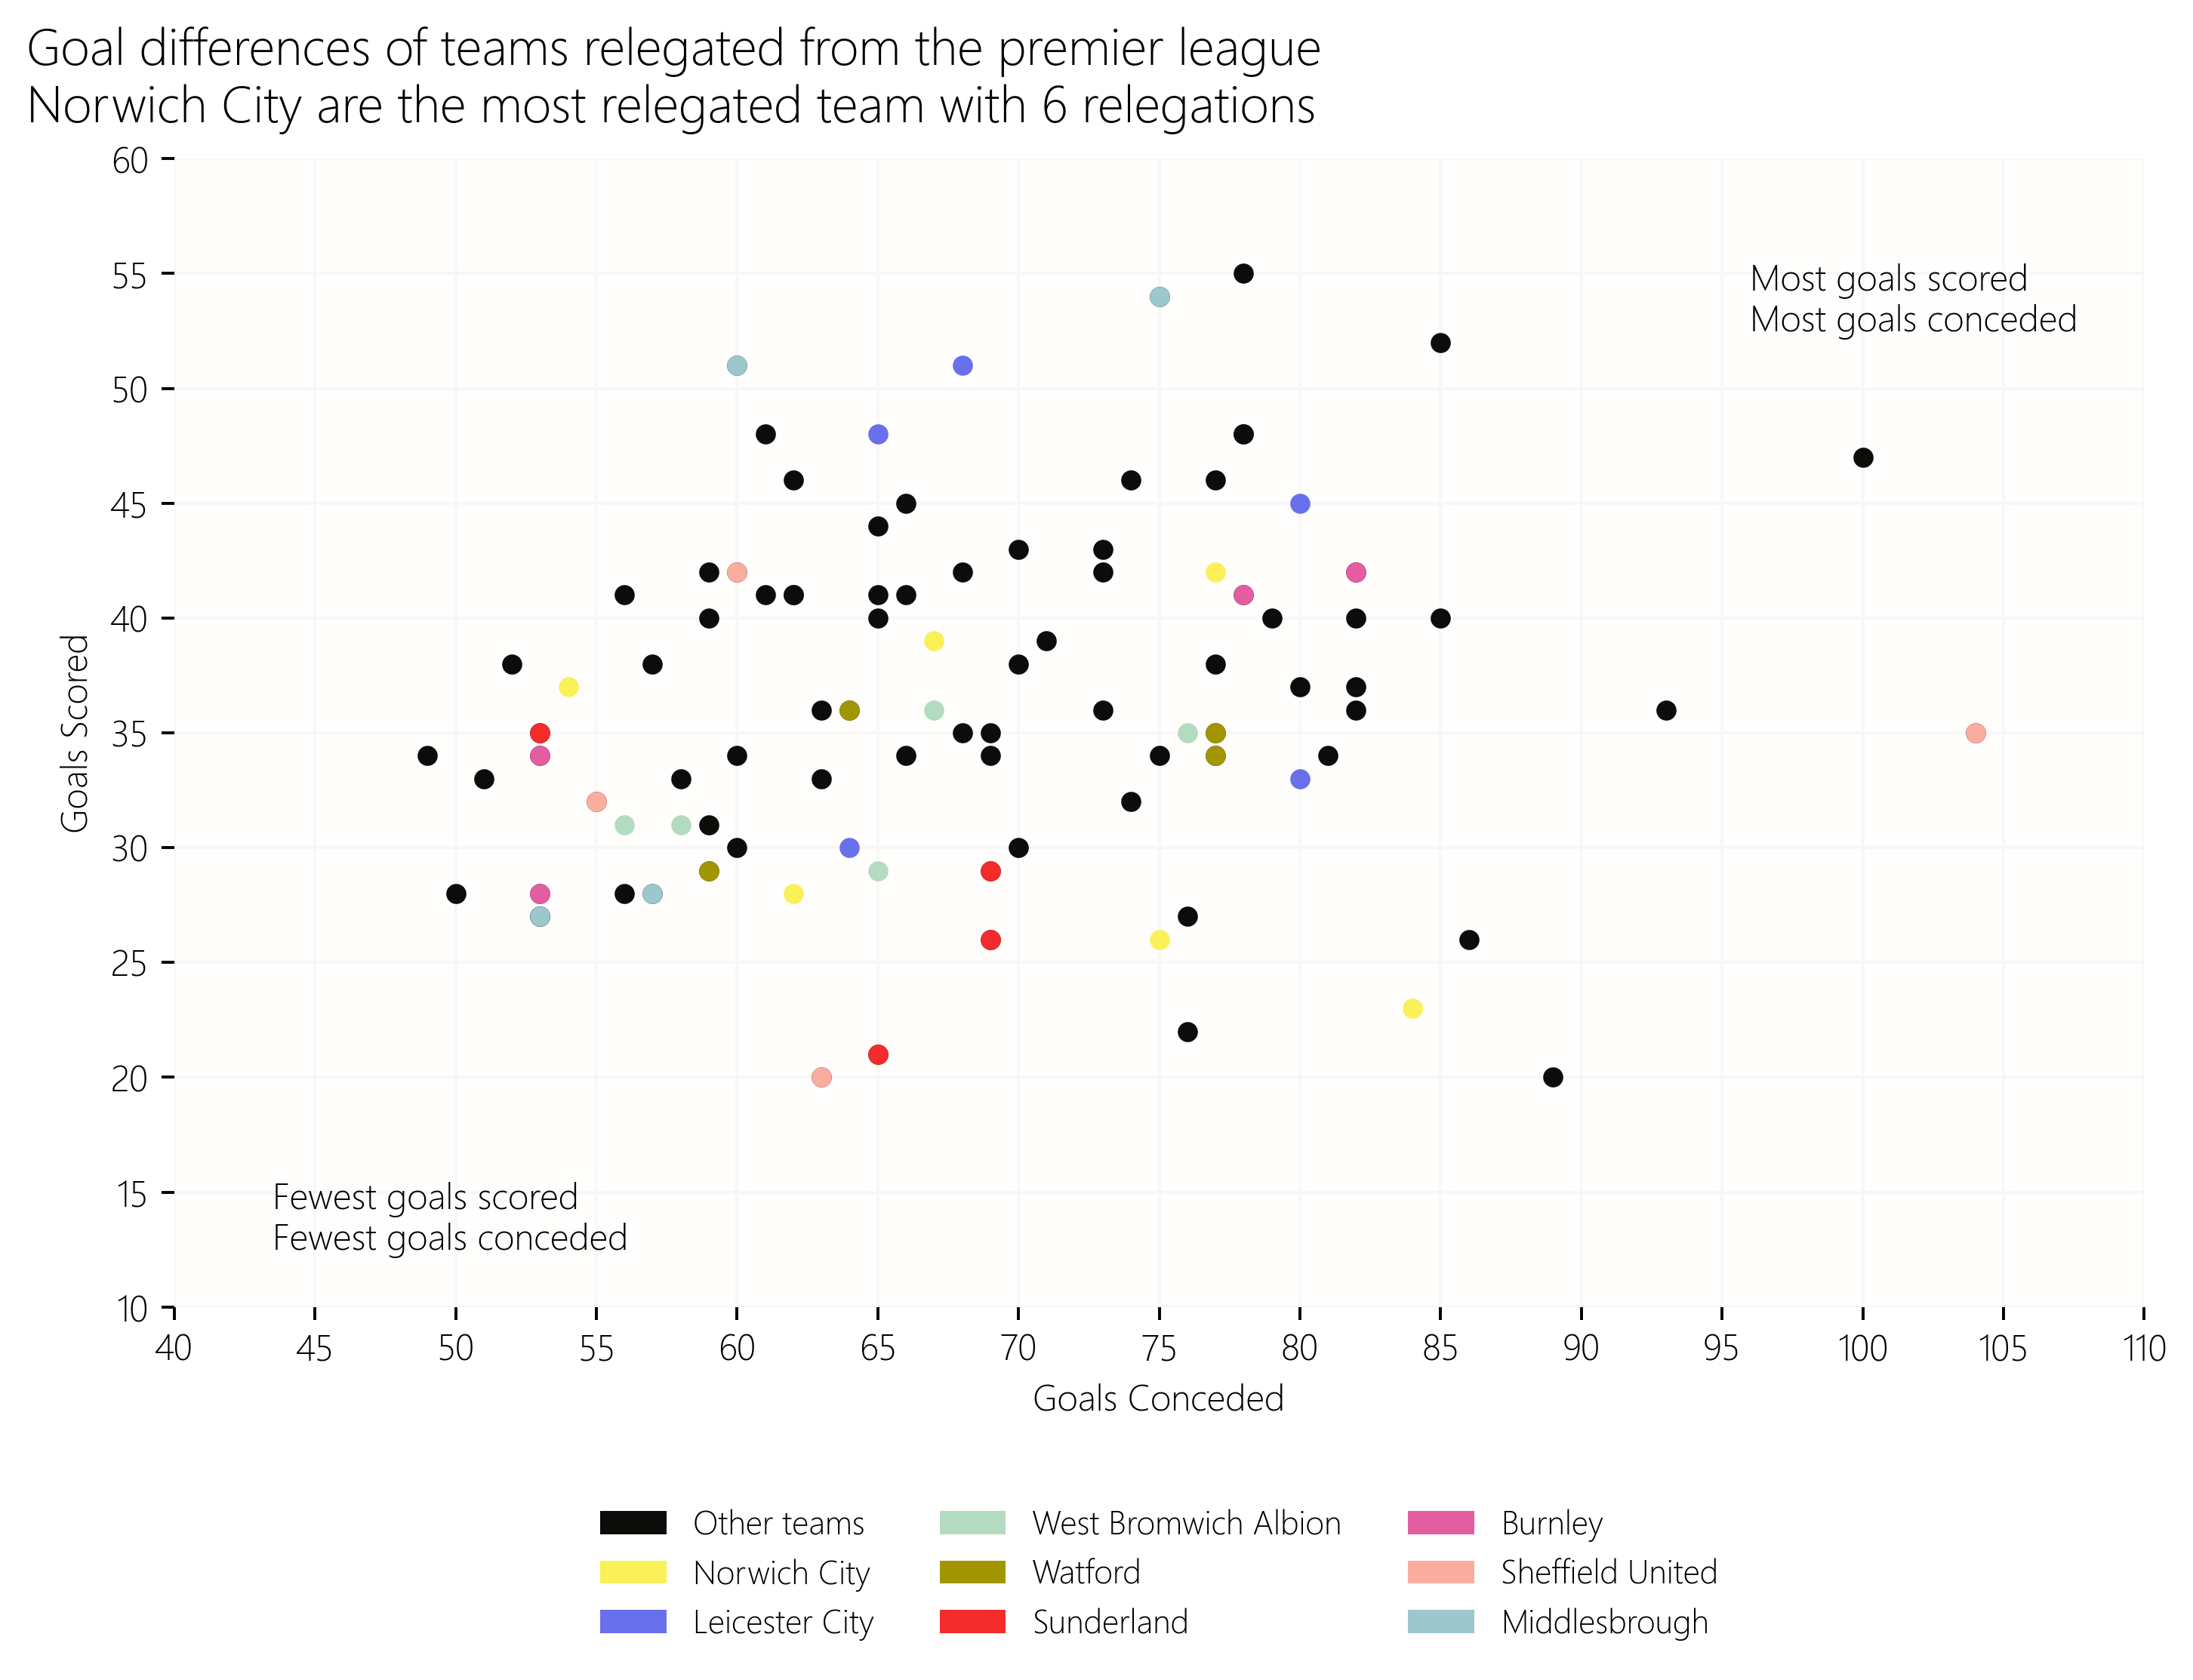

In [14]:
# to do - add annotation in corners like r plot. 

from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(8, 6), dpi=350)

plt.rc('axes',
       facecolor='#FFFEFC',
       edgecolor='none',
       axisbelow='True',
       grid='True',
       titlelocation='left',
       titley=1,
       titlepad=10,
       titlesize=14)

plt.rc('grid',
       color="#F7F7F7",
       linestyle='solid')

plt.rc('font',
       family="Segoe UI")

cols = {"Norwich City ":"#F9F157",
        "Leicester City ":"#6870EB",
        "West Bromwich Albion ":"#B3DBBF",
        "Watford ":"#A19600",
        "Sunderland ":"#F32B2B",
        "Burnley ":"#E35DA0",
        "Sheffield United ":"#FAAD9F",
        "Middlesbrough ":"#9BC7CD"}

point_size = 20

ax.scatter(rest_reg_df["ga"], rest_reg_df["gf"],
           s=point_size,c="#0C0C0B")

for team, color in cols.items():
    df = top_reg_df.filter(pl.col("team") == team)
    ax.scatter(df["ga"], df["gf"], s=point_size,
               c=color, label=team.strip())

#ax.scatter(top_reg_df["ga"], top_reg_df["gf"], s=12,c="#E5DD41")
#ax.scatter(top_reg_df["ga"], top_reg_df["gf"], s=12,c=top_reg_df.get_column("team").replace(cols))

ax.text(0.05, 0.05, 'Fewest goals scored\nFewest goals conceded', transform = ax.transAxes)
ax.text(0.8, 0.85, 'Most goals scored\nMost goals conceded', transform = ax.transAxes)

legend_elements = [Patch(facecolor=color, label=team.strip()) 
                   for team, color in cols.items()]

legend_elements.insert(0, Patch(facecolor="#0C0C0B", label="Other teams"))


ax.legend(handles=legend_elements, 
          loc='upper center',
          #Position (0.5 = center horizontally, -0.15 = below plot)
          bbox_to_anchor=(0.5, -0.15),
          ncol=3, 
          frameon=False,
          facecolor='white',
          edgecolor='#CCCCCC',
          fontsize=9)

plt.tight_layout()

ax.set_xlabel('Goals Conceded')
ax.set_ylabel('Goals Scored')
ax.set_xticks(np.arange(40, 115, step=5))
ax.set_yticks(np.arange(10, 65, step=5))
ax.set_title(reg_title,
             # like plot.title.position = plot - need the other params in axis settings too
             x=-0.075)

#plt.show()
plt.savefig("figures/relegated_gd.png",
            bbox_inches = "tight",
            pad_inches = 0.2)